In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk import sent_tokenize
from prepare import prepare
import seaborn as sns
from wordcloud import WordCloud

In [2]:
with open('data.json') as json_file:
    data = json.load(json_file)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             121 non-null    object
 1   language         119 non-null    object
 2   readme_contents  121 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [5]:
df = df[df.language != "Shell"]

In [6]:
df = df[df.language != "Java"]

In [7]:
df = df[df.language != "Ruby"]

In [8]:
df.language = df.language.astype('string')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 120
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             106 non-null    object
 1   language         104 non-null    string
 2   readme_contents  106 non-null    object
dtypes: object(2), string(1)
memory usage: 3.3+ KB


In [10]:
df = df[~df['language'].isnull()]

In [11]:
df.language.value_counts(dropna=False)

HTML          29
C#            27
Python        25
JavaScript    23
Name: language, dtype: Int64

In [12]:
type(df.language[0])

str

In [13]:
df.language.unique()

<StringArray>
['Python', 'JavaScript', 'HTML', 'C#']
Length: 4, dtype: string

# Check out prepare for prepare details

In [14]:
train, validate, test = prepare(df)

In [15]:
train.size, validate.size, test.size

(348, 150, 126)

In [16]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
63,Asabeneh/30-Days-Of-JavaScript,JavaScript,# 30 Days Of JavaScript\n\n| # Day | ...,30 days javascript day topics 01 introductionr...,30 day javascript day topic 01 introductionrea...,30 day javascript day topic 01 introductionrea...
18,MrS0m30n3/youtube-dl-gui,Python,[![Donations Badge](https://yourdonation.rocks...,donations badgehttpsyourdonationrocksimagesbad...,donat badgehttpsyourdonationrocksimagesbadgesv...,donation badgehttpsyourdonationrocksimagesbadg...
72,statianzo/Fleck,C#,Fleck\r\n===\r\n\r\n[![Build status](https://c...,fleck build statushttpsciappveyorcomapiproject...,fleck build statushttpsciappveyorcomapiproject...,fleck build statushttpsciappveyorcomapiproject...
12,ddbourgin/numpy-ml,Python,# numpy-ml\nEver wish you had an inefficient b...,numpyml ever wish inefficient somewhat legible...,numpyml ever wish ineffici somewhat legibl col...,numpyml ever wish inefficient somewhat legible...
88,mono/CppSharp,C#,CppSharp is a tool and set of libraries which ...,cppsharp tool set libraries facilitates usage ...,cppsharp tool set librari facilit usag nativ c...,cppsharp tool set library facilitates usage na...


# No duplicates

In [17]:
df[df.duplicated()]

,repo,language,readme_contents


# Exploration

In [18]:
def clean(text):
    'A simple function to cleanup text data'
    
    ADDITIONAL_STOPWORDS = []
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [19]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "language")

,n,percent
HTML,29,0.278846
C#,27,0.259615
Python,25,0.240385
JavaScript,23,0.221154


In [20]:
python_words = clean(' '.join(df[df.language == 'Python'].readme_contents))

In [21]:
c_sharp_words = clean(' '.join(df[df.language == 'C#'].readme_contents))

In [22]:
html_words = clean(' '.join(df[df.language == 'HTML'].readme_contents))

In [23]:
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))

In [24]:
java_words = clean(' '.join(df[df.language == 'Java'].readme_contents))

In [25]:
ruby_words = clean(' '.join(df[df.language == 'Ruby'].readme_contents))

In [26]:
shell_words = clean(' '.join(df[df.language == 'Shell'].readme_contents))

### Freq

In [27]:
python_freq = pd.Series(python_words).value_counts()

In [28]:
c_sharp_freq = pd.Series(c_sharp_words).value_counts()

In [29]:
html_freq = pd.Series(html_words).value_counts()

In [30]:
javascript_freq = pd.Series(javascript_words).value_counts()

In [31]:
java_freq = pd.Series(java_words).value_counts()

In [32]:
ruby_freq = pd.Series(ruby_words).value_counts()

In [33]:
shell_freq = pd.Series(shell_words).value_counts()

In [34]:
python_freq.head()

yes        1639
unknown     926
apikey      573
video       489
python      447
dtype: int64

In [35]:
c_sharp_freq.head()

new       192
c         188
use       186
var       185
string    156
dtype: int64

In [36]:
html_freq.head()

html        97
file        76
use         76
15001700    62
dom         51
dtype: int64

In [37]:
javascript_freq.head()

javascript    309
function      276
const         261
1             240
bad           205
dtype: int64

In [38]:
java_freq.head()

Series([], dtype: int64)

### Ruby and Shell only have one observation so we can either drop or go find more

In [39]:
ruby_freq.head()

Series([], dtype: int64)

In [40]:
shell_freq.head()

Series([], dtype: int64)

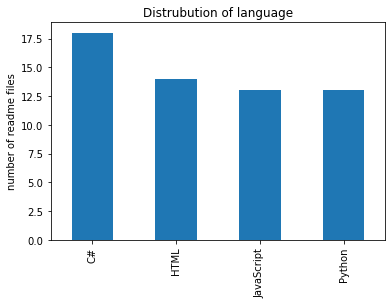

In [41]:
train.language.value_counts().plot.bar()
plt.title('Distrubution of language')
plt.ylabel('number of readme files')
plt.show()

In [42]:
def basic_clean (string):
    '''
    takes in a string and lowercase everything, normalize unicode characters, replace anything that is not a letter,
    number, whitespace or a single quote.
    retunr a clean string
    '''
    
    string = string.lower()
    string = unicodedata.normalize('NFKC',string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    string = re.sub(r"\w*.?\w*@\w*.com", '', string)
    string = re.sub(r"[^a-z0-9\s]", '', string)
    string = re.sub(r'\w*http\w*', '', string)
    string = re.sub(r'\w*github\w*', '', string)
    string = re.sub(r'\w*html\w*', '', string)
    string = re.sub(r'\w*gmail\w*', '', string)
    string = re.sub(r'\w*\n\w*', '', string)

    return string

In [43]:
#get the list of languages
list_lang = list(train.language.value_counts().index)

In [44]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = clean(' '.join(train[train.language == language].lemmatized))

#add allwords
join_text['all_words']= clean(' '.join(train.lemmatized))

In [45]:
#check if we have all the languages
join_text.keys()

dict_keys(['C#', 'HTML', 'JavaScript', 'Python', 'all_words'])

In [46]:
#create a word_count df 
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang]).value_counts()
word_counts= word_counts.fillna(0).astype(int)


In [48]:
word_counts.shape

(3468, 5)

In [49]:
word_counts.sort_values('all_words', ascending=False).head(30)

,C#,HTML,JavaScript,Python,all_words
9,225,236,266,59,786
python,3,1,5,419,428
1,30,7,231,121,389
function,12,3,267,60,342
use,71,39,107,117,334
javascript,5,1,286,4,296
const,1,0,263,0,264
library,21,0,7,205,233
2,19,9,90,112,230
file,16,23,37,152,228


In [50]:
def word_cloud (text):
    '''
    takes in a text and create a wordcloud
    '''

    plt.figure(figsize=(10,10))
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def wordcloud_top(df,column, n_top=50):
    '''
    takes in a df , column and a number of top words to show
    '''
    top_all =df.sort_values(column, ascending=False)[[column]].head(n_top)
    word_cloud(' '.join(top_all.index))


def ngrams_wordcloud (text, title,  n=2, top = 20):
    '''
    takes in a text, title, number of ngrams, and number of the top words
    returns a plot barh and a word_cloud
    '''
    #plot barh
    
    plt.figure(figsize=(25,25))
    
    plt.subplot(2,2,1)
    pd.Series(nltk.ngrams(text.split(), n=n)).value_counts().head(top).sort_values(ascending = True).plot.barh()
    plt.title(f'Top {top} most common {title} ngrams where n={n}')
    
    #word_cloud
    
    ng =(pd.Series(nltk.ngrams(text.split(), n=n)).value_counts().head(top)).to_dict()
    ng_words = {k[0] + ' ' + k[1]: v for k, v in ng.items()}
    plt.subplot(2,2,2)
    img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(ng_words)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top {top} most common {title} ngrams where n={n}')
    
    plt.show()

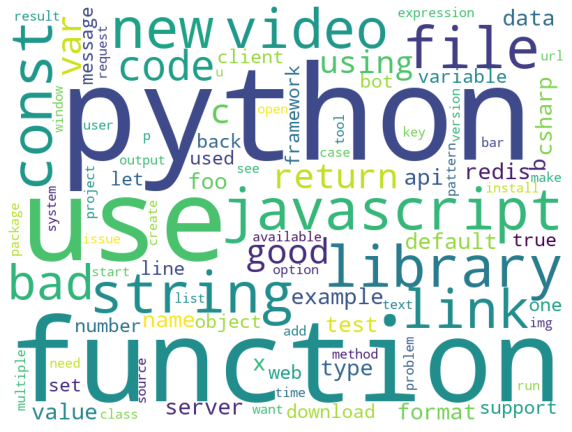

In [51]:
wordcloud_top(word_counts, 'all_words' , 100)

<Figure size 1800x1440 with 0 Axes>

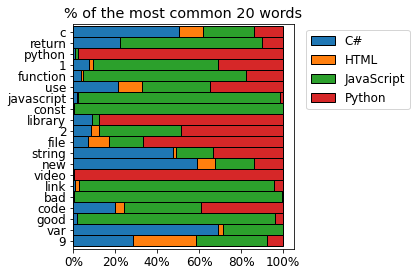

In [52]:
plt.figure(figsize=(25, 20))
plt.rc('font', size=12)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all_words'], axis=1)
 .sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of the most common 20 words')
plt.legend(bbox_to_anchor= (1.03,1))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

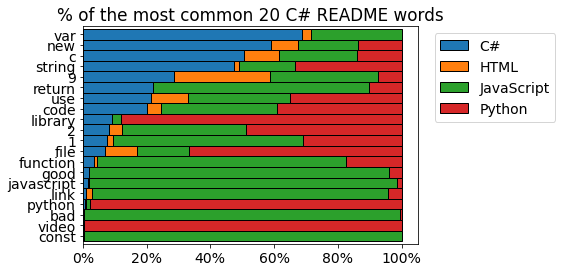

<Figure size 720x576 with 0 Axes>

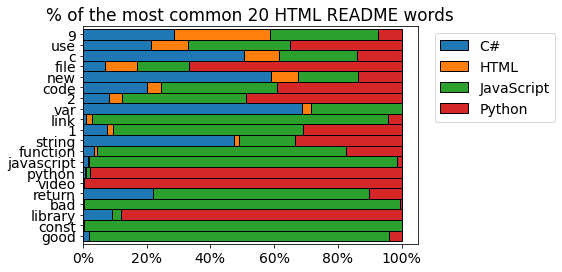

<Figure size 720x576 with 0 Axes>

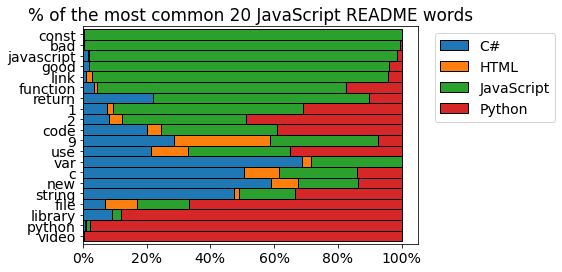

<Figure size 720x576 with 0 Axes>

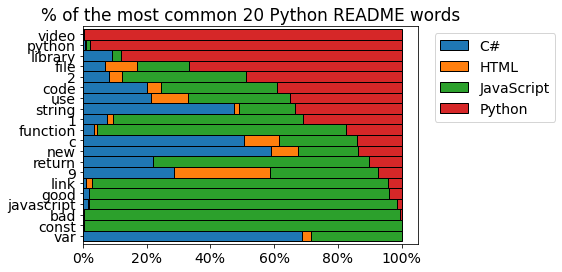

In [53]:
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(10, 8))
    plt.rc('font', size=14)
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1)
     .drop(columns='all_words')
     .sort_values(by= column)
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of the most common 20 {column} README words')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
    plt.show()